# First submit on Kaggle using the classic Titanic dataset

### Basic exploratory data analysis + usage of various models from sklearn

Based on tutorial: https://towardsdatascience.com/a-gentle-introduction-to-exploratory-data-analysis-f11d843b8184 

## Downloading the dataset

Sourse: https://www.kaggle.com/c/titanic/data

In [199]:
# Import Dependencies
%matplotlib inline

# Let's be rebels and ignore warnings
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings("ignore", message="numpy.dtype size changed")


# Start Python Imports
import math, time, random, datetime

# Data Manipulation
import numpy as np
import pandas as pd

# Visualization 
import matplotlib.pyplot as plt
import missingno
import seaborn as sns
plt.style.use('seaborn-whitegrid')

# Preprocessing
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, label_binarize

# Machine learning
from sklearn.model_selection import train_test_split
from sklearn import model_selection, tree, preprocessing, metrics, linear_model
from sklearn.svm import LinearSVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression, LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier


### Loading in the data

After we've downloaded the data, we need to get it into the notebook.

I've stored my downloaded data in a folder called `data`.

In [9]:
# Import train & test data 
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')
gender_submission = pd.read_csv('data/gender_submission.csv') # example of what a submission should look like

In [10]:
# View the training data
train.head(15)

PassengerId  Survived  Pclass  \
0             1         0       3   
1             2         1       1   
2             3         1       3   
3             4         1       1   
4             5         0       3   
5             6         0       3   
6             7         0       1   
7             8         0       3   
8             9         1       3   
9            10         1       2   
10           11         1       3   
11           12         1       1   
12           13         0       3   
13           14         0       3   
14           15         0       3   

                                                 Name     Sex   Age  SibSp  \
0                             Braund, Mr. Owen Harris    male  22.0      1   
1   Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                              Heikkinen, Miss. Laina  female  26.0      0   
3        Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                            Allen, Mr. William Henry    male  35.0      0   
5                                    Moran, Mr. James    male   NaN      0   
6                             McCarthy, Mr. Timothy J    male  54.0      0   
7                      Palsson, Master. Gosta Leonard    male   2.0      3   
8   Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)  female  27.0      0   
9                 Nasser, Mrs. Nicholas (Adele Achem)  female  14.0      1   
10                    Sandstrom, Miss. Marguerite Rut  female   4.0      1   
11                           Bonnell, Miss. Elizabeth  female  58.0      0   
12                     Saundercock, Mr. William Henry    male  20.0      0   
13                        Andersson, Mr. Anders Johan    male  39.0      1   
14               Vestrom, Miss. Hulda Amanda Adolfina  female  14.0      0   

    Parch            Ticket     Fare Cabin Embarked  
0       0         A/5 21171   7.2500   NaN        S  
1       0          PC 17599  71.2833   C85        C  
2       0  STON/O2. 3101282   7.9250   NaN        S  
3       0            113803  53.1000  C123        S  
4       0            373450   8.0500   NaN        S  
5       0            330877   8.4583   NaN        Q  
6       0             17463  51.8625   E46        S  
7       1            349909  21.0750   NaN        S  
8       2            347742  11.1333   NaN        S  
9       0            237736  30.0708   NaN        C  
10      1           PP 9549  16.7000    G6        S  
11      0            113783  26.5500  C103        S  
12      0         A/5. 2151   8.0500   NaN        S  
13      5            347082  31.2750   NaN        S  
14      0            350406   7.8542   NaN        S

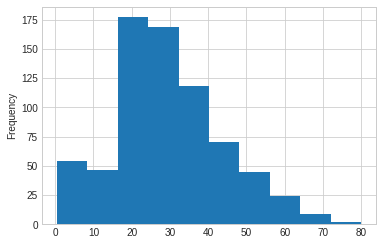

In [11]:
train.Age.plot.hist()

In [12]:
# View the test data (same columns as the training data)
test.head() # head = view first 5 lines

PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  
0  34.5      0      0   330911   7.8292   NaN        Q  
1  47.0      1      0   363272   7.0000   NaN        S  
2  62.0      0      0   240276   9.6875   NaN        Q  
3  27.0      0      0   315154   8.6625   NaN        S  
4  22.0      1      1  3101298  12.2875   NaN        S

In [6]:
# View the example submisison dataframe
gender_submission.head()

PassengerId  Survived
0          892         0
1          893         1
2          894         0
3          895         0
4          896         1

## Data Descriptions

**Survival:** 0 = No, 1 = Yes

**pclass (Ticket class):** 1 = 1st, 2 = 2nd, 3 = 3rd

**sex:** Sex

**Age:** Age in years

**sibsp:** number of siblings/spouses aboard the Titanic

**parch:** number of parents/children aboard the Titanic

**ticket:** Ticket number

**fare:** Passenger fare

**cabin:** Cabin number

**embarked:** Port of Embarkation, C = Cherbourg, Q = Queenstown, S = Southampton

In [13]:
train.describe()

PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

## What missing values are there?

Where are the holes in our data?

These are rows which are missing a value or have NaN instead of something like the rest of the column.

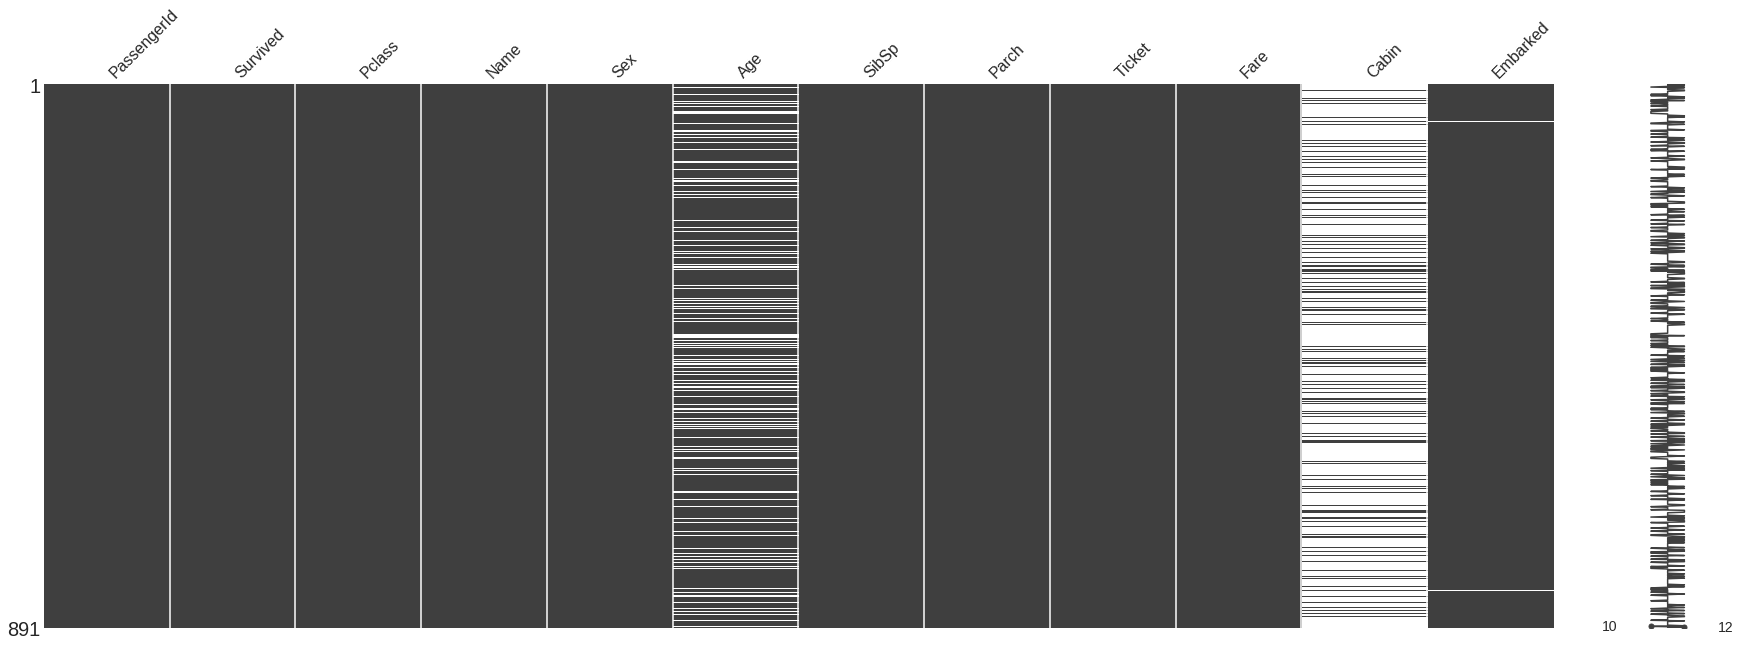

In [16]:
# Plot graphic of missing values
missingno.matrix(train, figsize = (30,10))

Ok we can clearly see some missing values here. Especially in the cabin column.

It's important to visualise missing values early so you know where the major holes are in your dataset.

Knowing this informaiton will help with your EDA and figuring out what kind of data cleaning and preprocessing is needed.

In [17]:
# Alternatively, you can see the number of missing values like this
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## To perform our data analysis, let's create two new dataframes

We'll create one for exploring discretised continuous variables (continuous variables which have been sorted into some kind of category) and another for exploring continuous variables.

In [18]:
df_bin = pd.DataFrame() # for discretised continuous variables
df_con = pd.DataFrame() # for continuous variables

## What datatypes are in the dataframe?

As a general rule of thumb, features with a datatype of object could be considered categorical features. And those which are floats or ints (numbers) could be considered numerical features.

However, as we dig deeper, we might find features which are numerical may actually be categorical.

The goal for the next few steps is to figure out how best to process the data so our machine learning model can learn from it.

Ideally, all the features will be encoded into a numerical value of some kind. 

In [19]:
# Different data types in the dataset
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

## Let's explore each of these features individually
We'll go through each column iteratively and see which ones to use in our first models.
Some may need more preprocessing than others to get ready.

In [20]:
train.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

### Target Feature: Survived

Description: Whether the passenger survived or not.
    
Key: 0 = did not survive, 1 = survived
    
This is the variable we want our machine learning model to predict based off all the others.

0    549
1    342
Name: Survived, dtype: int64


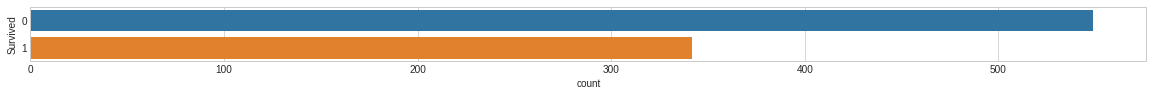

In [21]:
# How many people survived?
fig = plt.figure(figsize=(20,1))
sns.countplot(y='Survived', data=train);
print(train.Survived.value_counts())

In [22]:
# Let's add this to our subset dataframes
df_bin['Survived'] = train['Survived']
df_con['Survived'] = train['Survived']

In [23]:
df_bin.head()

Survived
0         0
1         1
2         1
3         1
4         0

In [24]:
df_con.head()

Survived
0         0
1         1
2         1
3         1
4         0

### Feature: Pclass

Description: The ticket class of the passenger.
    
Key: 1 = 1st, 2 = 2nd, 3 = 3rd

#### Let's plot the distribution
We will look at the distribution of each feature first if we can to understand what kind of spread there is across the dataset.

For example, if there are values which are completely outside of the distribution, we may not want to include them in our model.

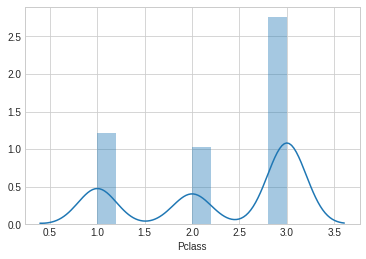

In [25]:
sns.distplot(train.Pclass)

We can see with this feature, the values are numerical (1, 2 and 3) but they are categories.

How do we know this? Because a passenger in Class 3 doesn't necessarily equal a passenger in Class 2 + a passenger in Class 1.

In [26]:
# How many missing variables does Pclass have?
train.Pclass.isnull().sum()

0

Since there are no missing values in Pclass, let's add it to our sub dataframes.

In [27]:
df_bin['Pclass'] = train['Pclass']
df_con['Pclass'] = train['Pclass']

### Feature: Name
    
Description: The name of the passenger.

In [20]:
# How many different names are there?
train.Name.value_counts()

Sage, Master. Thomas Henry                               1
Canavan, Miss. Mary                                      1
Calic, Mr. Petar                                         1
Davis, Miss. Mary                                        1
Lundahl, Mr. Johan Svensson                              1
Boulos, Mr. Hanna                                        1
Devaney, Miss. Margaret Delia                            1
Lindqvist, Mr. Eino William                              1
McGovern, Miss. Mary                                     1
Perkin, Mr. John Henry                                   1
Edvardsson, Mr. Gustaf Hjalmar                           1
Youseff, Mr. Gerious                                     1
Norman, Mr. Robert Douglas                               1
McEvoy, Mr. Michael                                      1
O'Brien, Mr. Thomas                                      1
Wick, Miss. Mary Natalie                                 1
Frauenthal, Mrs. Henry William (Clara Heinsheimer)      

Every row has a unique name. This is equivalent to the passenger ID. But name could be used differently.

Can you think of ways you could reduce the number of different names? Or create new features out of the names?

**Note:** Because of so many different names and to keep this EDA fast, we won't move forward using the name variable.

### Feature: Sex

Description: The sex of the passenger (male or female).

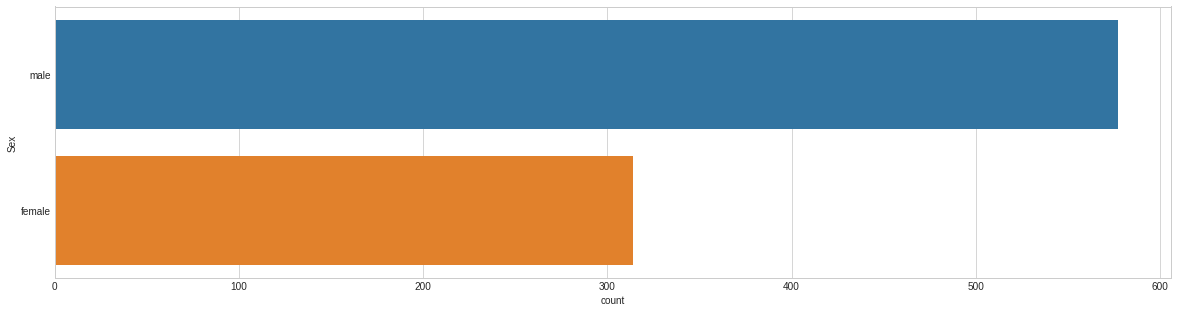

In [28]:
# Let's view the distribution of Sex
plt.figure(figsize=(20, 5))
sns.countplot(y="Sex", data=train);

In [29]:
# Are there any missing values in the Sex column?
train.Sex.isnull().sum()

0

Since this is already binary variable (male or female), let's add it straight to our subset dataframes.

In [30]:
train.Sex.head()

0      male
1    female
2    female
3    female
4      male
Name: Sex, dtype: object

In [31]:
# add Sex to the subset dataframes
df_bin['Sex'] = train['Sex']
df_bin['Sex'] = np.where(df_bin['Sex'] == 'female', 1, 0) # change sex to 0 for male and 1 for female

df_con['Sex'] = train['Sex']

In [34]:
df_con.head()

Survived  Pclass     Sex
0         0       3    male
1         1       1  female
2         1       3  female
3         1       1  female
4         0       3    male

In [33]:
df_bin.head()

Survived  Pclass  Sex
0         0       3    0
1         1       1    1
2         1       3    1
3         1       1    1
4         0       3    0

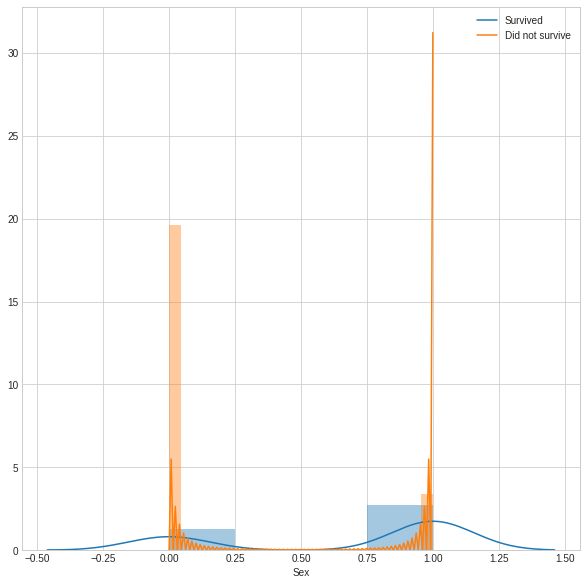

In [35]:
# How does the Sex variable look compared to Survival?
# We can see this because they're both binarys.
fig = plt.figure(figsize=(10, 10))
sns.distplot(df_bin.loc[df_bin['Survived'] == 1]['Sex'], kde_kws={'label': 'Survived'});
sns.distplot(df_bin.loc[df_bin['Survived'] == 0]['Sex'], kde_kws={'label': 'Did not survive'});

Not many people survived. But of those who did, more were female.

### Feature: Age

Description: The age of the passenger.

In [26]:
# How many missing values does age have?
train.Age.isnull().sum()

177

Out of a total 891 rows, that's almost one quarter of the dataset.

What would you do with these missing values?

Could replace them with the average age? What's the pro's and con's of doing this?

Or would you get rid of them completely?

We won't answer these questions in our initial EDA but this is something we would definitely revisit at a later date.


In [36]:
train['AgeIsNull'] = pd.isnull(train['Age']).astype(int)

In [39]:
train['Age'].fillna((train['Age'].mean()), inplace=True)

In [42]:
df_con['AgeIsNull'] = train['AgeIsNull']

In [43]:
df_bin['AgeIsNull'] = train['AgeIsNull']

In [46]:
# Once the Age values have been fixed up, we can add them to our sub dataframes.
df_bin['Age'] = pd.cut(train['Age'], 10) # bucketed/binned into different categories
df_con['Age'] = train['Age'] # non-bucketed

In [49]:
df_bin.head(7)

Survived  Pclass  Sex  AgeIsNull               Age
0         0       3    0          0  (16.336, 24.294]
1         1       1    1          0   (32.252, 40.21]
2         1       3    1          0  (24.294, 32.252]
3         1       1    1          0   (32.252, 40.21]
4         0       3    0          0   (32.252, 40.21]
5         0       3    0          1  (24.294, 32.252]
6         0       1    0          0  (48.168, 56.126]

In [50]:
df_con.head(7)

Survived  Pclass     Sex  AgeIsNull        Age
0         0       3    male          0  22.000000
1         1       1  female          0  38.000000
2         1       3  female          0  26.000000
3         1       1  female          0  35.000000
4         0       3    male          0  35.000000
5         0       3    male          1  29.699118
6         0       1    male          0  54.000000

**Challenge:** How would you fill the missing variables in the `Age` column?

#### Function to create count and distribution visualisations

In [51]:
def plot_count_dist(data, bin_df, label_column, target_column, figsize=(20, 5), use_bin_df=False):
    """
    Function to plot counts and distributions of a label variable and 
    target variable side by side.
    ::param_data:: = target dataframe
    ::param_bin_df:: = binned dataframe for countplot
    ::param_label_column:: = binary labelled column
    ::param_target_column:: = column you want to view counts and distributions
    ::param_figsize:: = size of figure (width, height)
    ::param_use_bin_df:: = whether or not to use the bin_df, default False
    """
    if use_bin_df: 
        fig = plt.figure(figsize=figsize)
        plt.subplot(1, 2, 1)
        sns.countplot(y=target_column, data=bin_df);
        plt.subplot(1, 2, 2)
        sns.distplot(data.loc[data[label_column] == 1][target_column], 
                     kde_kws={"label": "Survived"});
        sns.distplot(data.loc[data[label_column] == 0][target_column], 
                     kde_kws={"label": "Did not survive"});
    else:
        fig = plt.figure(figsize=figsize)
        plt.subplot(1, 2, 1)
        sns.countplot(y=target_column, data=data);
        plt.subplot(1, 2, 2)
        sns.distplot(data.loc[data[label_column] == 1][target_column], 
                     kde_kws={"label": "Survived"});
        sns.distplot(data.loc[data[label_column] == 0][target_column], 
                     kde_kws={"label": "Did not survive"});

### Feature: SibSp

Description: The number of siblings/spouses the passenger has aboard the Titanic.

In [52]:
# How many missing values does SibSp have?
train.SibSp.isnull().sum()

0

In [53]:
# What values are there?
train.SibSp.value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

Let's add SibSp to our subset dataframes and view the distributions.

In [54]:
# Add SibSp to subset dataframes
df_bin['SibSp'] = train['SibSp']
df_con['SibSp'] = train['SibSp']

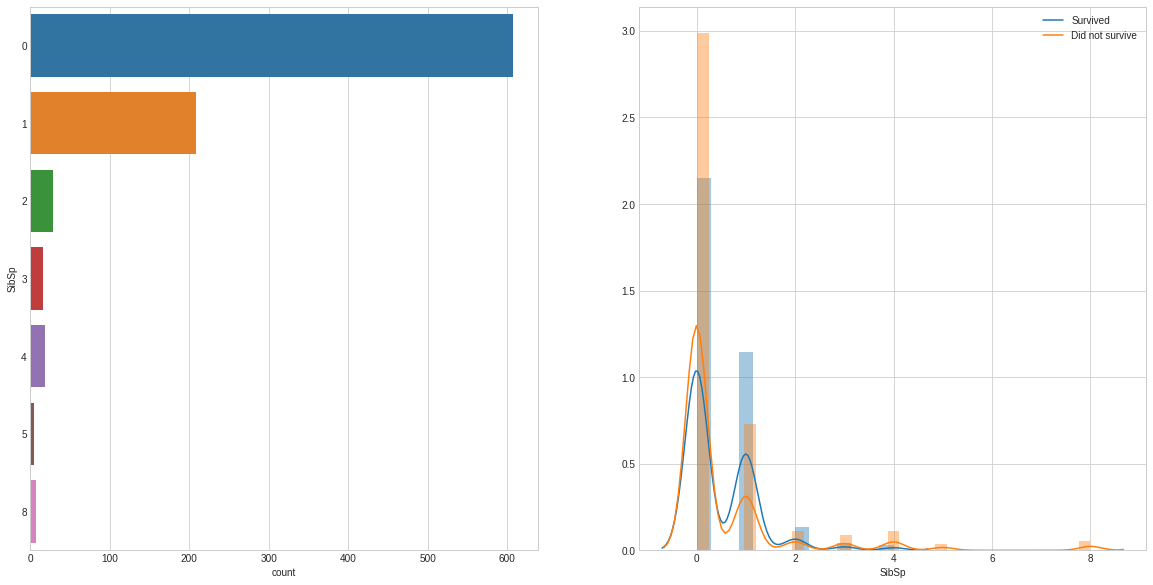

In [55]:
# Visualise the counts of SibSp and the distribution of the values
# against Survived
plot_count_dist(train, 
                bin_df=df_bin, 
                label_column='Survived', 
                target_column='SibSp', 
                figsize=(20, 10))

What does the graph on the right tell us?

### Feature: Parch

Description: The number of parents/children the passenger has aboard the Titanic.

Since this feature is similar to SibSp, we'll do a similar analysis.

In [56]:
# How many missing values does Parch have?
train.Parch.isnull().sum()

0

In [57]:
# What values are there?
train.Parch.value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [62]:
# Add Parch to subset dataframes
df_bin['Parch'] = train['Parch']
df_con['Parch'] = train['Parch']

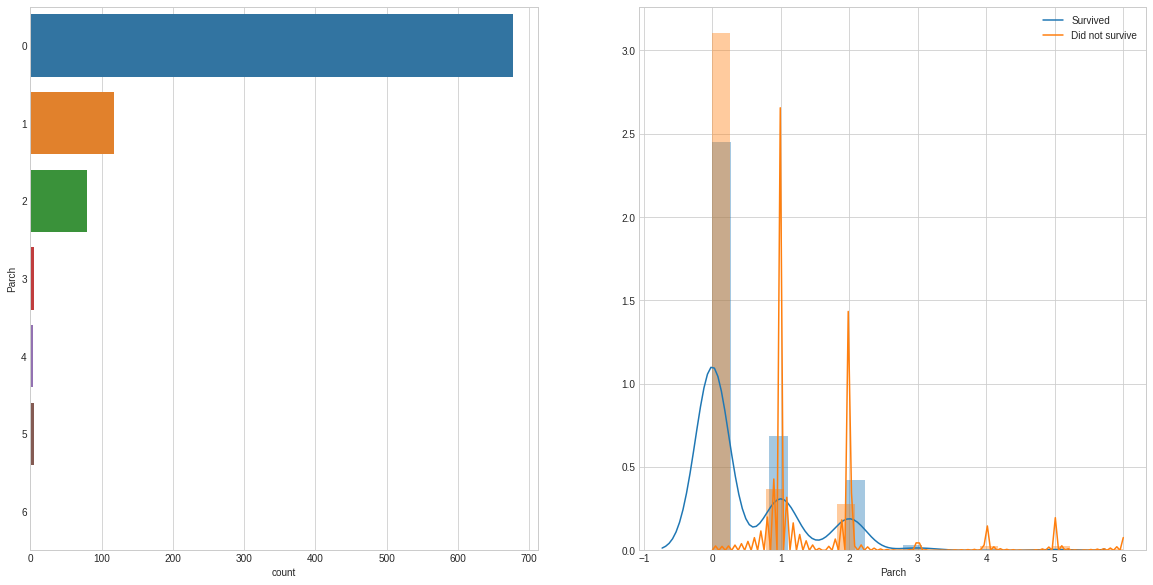

In [63]:
# Visualise the counts of Parch and the distribution of the values
# against Survived
plot_count_dist(train, 
                bin_df=df_bin,
                label_column='Survived', 
                target_column='Parch', 
                figsize=(20, 10))

What does the graph on the right tell us about `Parch`?

In [64]:
train.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  AgeIsNull  
0      0         A/5 21171   7.2500   NaN        S          0  
1      0          PC 17599  71.2833   C85        C          0  
2      0  STON/O2. 3101282   7.9250   NaN        S          0  
3      0            113803  53.1000  C123        S          0  
4      0            373450   8.0500   NaN        S          0

In [65]:
df_con.head()

Survived  Pclass     Sex  AgeIsNull   Age  SibSp  Parch
0         0       3    male          0  22.0      1      0
1         1       1  female          0  38.0      1      0
2         1       3  female          0  26.0      0      0
3         1       1  female          0  35.0      1      0
4         0       3    male          0  35.0      0      0

### Feature: Ticket

Description: The ticket number of the boarding passenger.

In [66]:
# How many missing values does Ticket have?
train.Ticket.isnull().sum()

0

In [68]:
# How many unique kinds of Ticket are there?
print("There are {} unique Ticket values.".format(len(train.Ticket.unique())))

There are 681 unique Ticket values.


681 unique values is too many for now. So we won't use `Ticket` in our subset dataframes.

### Feature: Fare

Description: How much the ticket cost.

In [69]:
# How many missing values does Fare have?
train.Fare.isnull().sum()

0

In [70]:
# How many unique kinds of Fare are there?
print("There are {} unique Fare values.".format(len(train.Fare.unique())))

There are 248 unique Fare values.


Because Fare is a float (number) let's add it as it is to our continuous sub dataframe but to add it to our categorical sub dataframe, we'll cut it into bins.

In [71]:
# Add Fare to sub dataframes
df_con['Fare'] = train['Fare'] 
df_bin['Fare'] = pd.cut(train['Fare'], bins=5) # discretised 

In [72]:
# What do our Fare bins look like?
df_bin.Fare.value_counts()

(-0.512, 102.466]     838
(102.466, 204.932]     33
(204.932, 307.398]     17
(409.863, 512.329]      3
(307.398, 409.863]      0
Name: Fare, dtype: int64

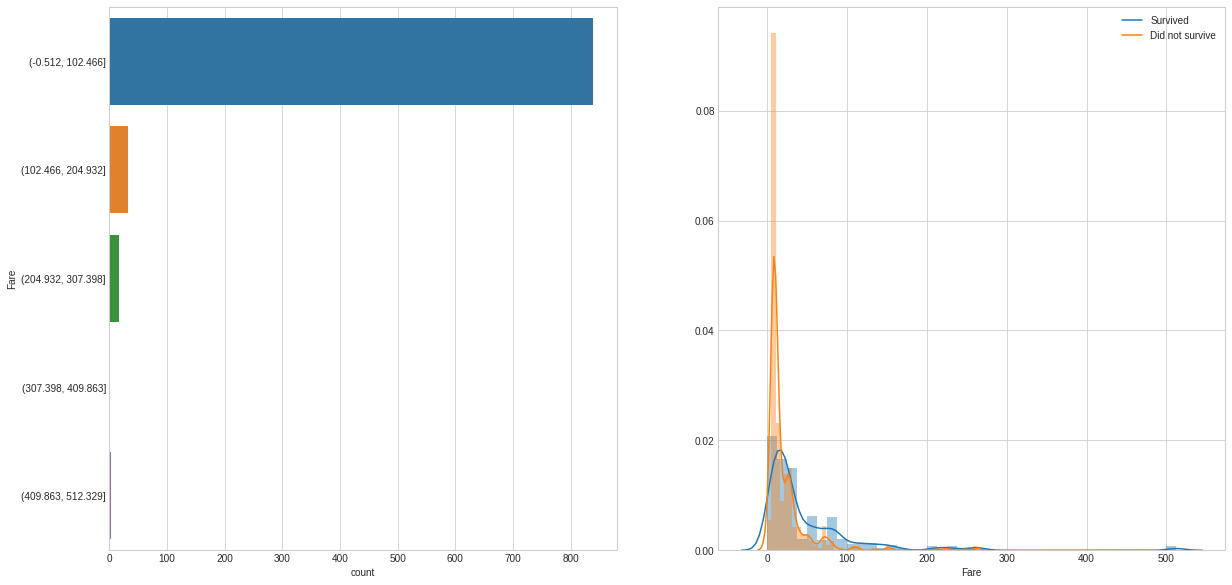

In [73]:
# Visualise the Fare bin counts as well as the Fare distribution versus Survived.
plot_count_dist(data=train,
                bin_df=df_bin,
                label_column='Survived', 
                target_column='Fare', 
                figsize=(20,10), 
                use_bin_df=True)

**Challenge:** How would you change the Fare bins?

### Feature: Cabin

Description: The cabin number where the passenger was staying.    

In [74]:
# How many missing values does Cabin have?
train.Cabin.isnull().sum()

687

Since there are too many missing values, we won't use Cabin for our initial models and won't add it to our sub dataframes.

### Feature: Embarked

Description: The port where the passenger boarded the Titanic.
    
Key: C = Cherbourg, Q = Queenstown, S = Southampton

In [77]:
# How many missing values does Embarked have?
train.Embarked.isnull().sum()

2

In [78]:
# What kind of values are in Embarked?
train.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

Embarked is a categorical variable because there are 3 categories which a passenger could have boarded on.

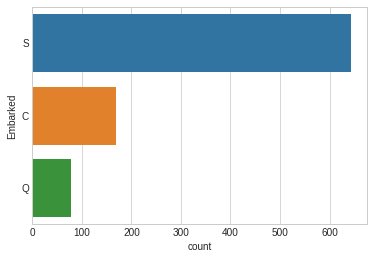

In [79]:
# What do the counts look like?
sns.countplot(y='Embarked', data=train);

#### How can we deal with the 2 missing values of Embarked?

One option is to drop the two rows which don't have an Embarked value.

Another option would be to randomly assign a value of C, Q or S to each row.

What are the pros and cons of each?

For now, we will remove those rows.

In [80]:
train = train.dropna(subset=['Embarked'])

In [81]:
# Add Embarked to sub dataframes
df_bin['Embarked'] = train['Embarked']
df_con['Embarked'] = train['Embarked']

We've removed the two rows with missing values for Embarked, now we can add Embarked to our sub dataframes.

## Feature Encoding
Now we have our two sub dataframes ready. We can encode the features so they're ready to be used with our machine learning models.

We will encode our binned dataframe (`df_bin`) with one-hot encoding and our continuous dataframe (`df_con`) with the label encoding function from `sklearn`.

In [84]:
df_bin.head()

Survived  Pclass  Sex  AgeIsNull               Age  SibSp  Parch  \
0         0       3    0          0  (16.336, 24.294]      1      0   
1         1       1    1          0   (32.252, 40.21]      1      0   
2         1       3    1          0  (24.294, 32.252]      0      0   
3         1       1    1          0   (32.252, 40.21]      1      0   
4         0       3    0          0   (32.252, 40.21]      0      0   

                Fare Embarked  
0  (-0.512, 102.466]        S  
1  (-0.512, 102.466]        C  
2  (-0.512, 102.466]        S  
3  (-0.512, 102.466]        S  
4  (-0.512, 102.466]        S

In [86]:
# One-hot encode binned variables
one_hot_cols = df_bin.columns.tolist()
one_hot_cols.remove('Survived')
df_bin_enc = pd.get_dummies(df_bin, columns=one_hot_cols)

df_bin_enc.head(20).T

0   1   2   3   4   5   6   7   8   9   10  11  12  \
Survived                  0   1   1   1   0   0   0   0   1   1   1   1   0   
Pclass_1                  0   1   0   1   0   0   1   0   0   0   0   1   0   
Pclass_2                  0   0   0   0   0   0   0   0   0   1   0   0   0   
Pclass_3                  1   0   1   0   1   1   0   1   1   0   1   0   1   
Sex_0                     1   0   0   0   1   1   1   1   0   0   0   0   1   
Sex_1                     0   1   1   1   0   0   0   0   1   1   1   1   0   
AgeIsNull_0               1   1   1   1   1   0   1   1   1   1   1   1   1   
AgeIsNull_1               0   0   0   0   0   1   0   0   0   0   0   0   0   
Age_(0.34, 8.378]         0   0   0   0   0   0   0   1   0   0   1   0   0   
Age_(8.378, 16.336]       0   0   0   0   0   0   0   0   0   1   0   0   0   
Age_(16.336, 24.294]      1   0   0   0   0   0   0   0   0   0   0   0   1   
Age_(24.294, 32.252]      0   0   1   0   0   1   0   0   1   0   0   0   0   
Age_(32.252, 40.21]       0   1   0   1   1   0   0   0   0   0   0   0   0   
Age_(40.21, 48.168]       0   0   0   0   0   0   0   0   0   0   0   0   0   
Age_(48.168, 56.126]      0   0   0   0   0   0   1   0   0   0   0   0   0   
Age_(56.126, 64.084]      0   0   0   0   0   0   0   0   0   0   0   1   0   
Age_(64.084, 72.042]      0   0   0   0   0   0   0   0   0   0   0   0   0   
Age_(72.042, 80.0]        0   0   0   0   0   0   0   0   0   0   0   0   0   
SibSp_0                   0   0   1   0   1   1   1   0   1   0   0   1   1   
SibSp_1                   1   1   0   1   0   0   0   0   0   1   1   0   0   
SibSp_2                   0   0   0   0   0   0   0   0   0   0   0   0   0   
SibSp_3                   0   0   0   0   0   0   0   1   0   0   0   0   0   
SibSp_4                   0   0   0   0   0   0   0   0   0   0   0   0   0   
SibSp_5                   0   0   0   0   0   0   0   0   0   0   0   0   0   
SibSp_8                   0   0   0   0   0   0   0   0   0   0   0   0   0   
Parch_0                   1   1   1   1   1   1   1   0   0   1   0   1   1   
Parch_1                   0   0   0   0   0   0   0   1   0   0   1   0   0   
Parch_2                   0   0   0   0   0   0   0   0   1   0   0   0   0   
Parch_3                   0   0   0   0   0   0   0   0   0   0   0   0   0   
Parch_4                   0   0   0   0   0   0   0   0   0   0   0   0   0   
Parch_5                   0   0   0   0   0   0   0   0   0   0   0   0   0   
Parch_6                   0   0   0   0   0   0   0   0   0   0   0   0   0   
Fare_(-0.512, 102.466]    1   1   1   1   1   1   1   1   1   1   1   1   1   
Fare_(102.466, 204.932]   0   0   0   0   0   0   0   0   0   0   0   0   0   
Fare_(204.932, 307.398]   0   0   0   0   0   0   0   0   0   0   0   0   0   
Fare_(307.398, 409.863]   0   0   0   0   0   0   0   0   0   0   0   0   0   
Fare_(409.863, 512.329]   0   0   0   0   0   0   0   0   0   0   0   0   0   
Embarked_C                0   1   0   0   0   0   0   0   0   1   0   0   0   
Embarked_Q                0   0   0   0   0   1   0   0   0   0   0   0   0   
Embarked_S                1   0   1   1   1   0   1   1   1   0   1   1   1   

                         13  14  15  16  17  18  19  
Survived                  0   0   1   0   1   0   1  
Pclass_1                  0   0   0   0   0   0   0  
Pclass_2                  0   0   1   0   1   0   0  
Pclass_3                  1   1   0   1   0   1   1  
Sex_0                     1   0   0   1   1   0   0  
Sex_1                     0   1   1   0   0   1   1  
AgeIsNull_0               1   1   1   1   0   1   0  
AgeIsNull_1               0   0   0   0   1   0   1  
Age_(0.34, 8.378]         0   0   0   1   0   0   0  
Age_(8.378, 16.336]       0   1   0   0   0   0   0  
Age_(16.336, 24.294]      0   0   0   0   0   0   0  
Age_(24.294, 32.252]      0   0   0   0   1   1   1  
Age_(32.252, 40.21]       1   0   0   0   0   0   0  
Age_(40.21, 48.168]       0  

In [87]:
df_con.head(10)

Survived  Pclass     Sex  AgeIsNull        Age  SibSp  Parch     Fare  \
0         0       3    male          0  22.000000      1      0   7.2500   
1         1       1  female          0  38.000000      1      0  71.2833   
2         1       3  female          0  26.000000      0      0   7.9250   
3         1       1  female          0  35.000000      1      0  53.1000   
4         0       3    male          0  35.000000      0      0   8.0500   
5         0       3    male          1  29.699118      0      0   8.4583   
6         0       1    male          0  54.000000      0      0  51.8625   
7         0       3    male          0   2.000000      3      1  21.0750   
8         1       3  female          0  27.000000      0      2  11.1333   
9         1       2  female          0  14.000000      1      0  30.0708   

  Embarked  
0        S  
1        C  
2        S  
3        S  
4        S  
5        Q  
6        S  
7        S  
8        S  
9        C

**Update:** The original version of this notebook used the `LabelEncoder()` function for encoding `df_con_enc`. However, as Tomáš pointed out, OneHotEncoder is better to use.
    
Check this article for more details: https://medium.com/@contactsunny/label-encoder-vs-one-hot-encoder-in-machine-learning-3fc273365621

In [88]:
# One hot encode the categorical columns
df_embarked_one_hot = pd.get_dummies(df_con['Embarked'], 
                                     prefix='embarked')

df_sex_one_hot = pd.get_dummies(df_con['Sex'], 
                                prefix='sex')

df_plcass_one_hot = pd.get_dummies(df_con['Pclass'], 
                                   prefix='pclass')

In [91]:
# Combine the one hot encoded columns with df_con_enc
df_con_enc = pd.concat([df_con, 
                        df_embarked_one_hot, 
                        df_sex_one_hot, 
                        df_plcass_one_hot], axis=1)

# Drop the original categorical columns (because now they've been one hot encoded)
df_con_enc = df_con_enc.drop(['Pclass', 'Sex', 'Embarked'], axis=1)

In [92]:
# Let's look at df_con_enc
df_con_enc.head(20)

Survived  AgeIsNull        Age  SibSp  Parch     Fare  embarked_C  \
0          0          0  22.000000      1      0   7.2500           0   
1          1          0  38.000000      1      0  71.2833           1   
2          1          0  26.000000      0      0   7.9250           0   
3          1          0  35.000000      1      0  53.1000           0   
4          0          0  35.000000      0      0   8.0500           0   
5          0          1  29.699118      0      0   8.4583           0   
6          0          0  54.000000      0      0  51.8625           0   
7          0          0   2.000000      3      1  21.0750           0   
8          1          0  27.000000      0      2  11.1333           0   
9          1          0  14.000000      1      0  30.0708           1   
10         1          0   4.000000      1      1  16.7000           0   
11         1          0  58.000000      0      0  26.5500           0   
12         0          0  20.000000      0      0   8.0500           0   
13         0          0  39.000000      1      5  31.2750           0   
14         0          0  14.000000      0      0   7.8542           0   
15         1          0  55.000000      0      0  16.0000           0   
16         0          0   2.000000      4      1  29.1250           0   
17         1          1  29.699118      0      0  13.0000           0   
18         0          0  31.000000      1      0  18.0000           0   
19         1          1  29.699118      0      0   7.2250           1   

    embarked_Q  embarked_S  sex_female  sex_male  pclass_1  pclass_2  pclass_3  
0            0           1           0         1         0         0         1  
1            0           0           1         0         1         0         0  
2            0           1           1         0         0         0         1  
3            0           1           1         0         1         0         0  
4            0           1           0         1         0         0         1  
5            1           0           0         1         0         0         1  
6            0           1           0         1         1         0         0  
7            0           1           0         1         0         0         1  
8            0           1           1         0         0         0         1  
9            0           0           1         0         0         1         0  
10           0           1           1         0         0         0         1  
11           0           1           1         0         1         0         0  
12           0           1           0         1         0         0         1  
13           0           1           0         1         0         0         1  
14           0           1           1         0         0         0         1  
15           0           1           1         0         0         1         0  
16           1           0           0         1         0         0         1  
17           0           1           0         1         0         1         0  
18           0           1           1         0         0         0         1  
19           0           0           1         0         0         0         1

## Start Building Machine Learning Models
Now our data has been manipulating and converted to numbers, we can run a series of different machine learning algorithms over it to find which yield the best results.

### Let's separate the data

In [93]:
# Seclect the dataframe we want to use first for predictions
selected_df = df_con_enc

In [94]:
selected_df.head()

Survived  AgeIsNull   Age  SibSp  Parch     Fare  embarked_C  embarked_Q  \
0         0          0  22.0      1      0   7.2500           0           0   
1         1          0  38.0      1      0  71.2833           1           0   
2         1          0  26.0      0      0   7.9250           0           0   
3         1          0  35.0      1      0  53.1000           0           0   
4         0          0  35.0      0      0   8.0500           0           0   

   embarked_S  sex_female  sex_male  pclass_1  pclass_2  pclass_3  
0           1           0         1         0         0         1  
1           0           1         0         1         0         0  
2           1           1         0         0         0         1  
3           1           1         0         1         0         0  
4           1           0         1         0         0         1

In [95]:
# Split the dataframe into data and labels
X_train = selected_df.drop('Survived', axis=1) # data
y_train = selected_df.Survived # labels

In [96]:
# Shape of the data (without labels)
X_train.shape

(891, 13)

In [97]:
X_train.head()

AgeIsNull   Age  SibSp  Parch     Fare  embarked_C  embarked_Q  embarked_S  \
0          0  22.0      1      0   7.2500           0           0           1   
1          0  38.0      1      0  71.2833           1           0           0   
2          0  26.0      0      0   7.9250           0           0           1   
3          0  35.0      1      0  53.1000           0           0           1   
4          0  35.0      0      0   8.0500           0           0           1   

   sex_female  sex_male  pclass_1  pclass_2  pclass_3  
0           0         1         0         0         1  
1           1         0         1         0         0  
2           1         0         0         0         1  
3           1         0         1         0         0  
4           0         1         0         0         1

In [98]:
# Shape of the labels
y_train.shape

(891,)

### Define a function to fit machine learning algorithms
Since many of the algorithms we will use are from the sklearn library, they all take similar (practically the same) inputs and produce similar outputs.

To prevent writing code multiple times, we will functionise fitting the model and returning the accuracy scores.

In [215]:
# Function that runs the requested algorithm and returns the accuracy metrics
def fit_ml_algo(algo, X_train, y_train, cv):
    
    # One Pass
    model = algo.fit(X_train, y_train)
    acc = round(model.score(X_train, y_train) * 100, 2)

    return acc

### Logistic Regression

In [221]:
# Logistic Regression
start_time = time.time()
acc_log = fit_ml_algo(LogisticRegression(), X_train, y_train, 10)
log_time = (time.time() - start_time)

print("Accuracy: %s" % acc_log)
print("Running Time: %s" % datetime.timedelta(seconds=log_time))

Accuracy: 79.91
Running Time: 0:00:00.045324


### K-Nearest Neighbours

In [222]:
# k-Nearest Neighbours
start_time = time.time()
acc_knn = fit_ml_algo(KNeighborsClassifier(), X_train, y_train, 10)
knn_time = (time.time() - start_time)

print("Accuracy: %s" % acc_knn)
print("Running Time: %s" % datetime.timedelta(seconds=knn_time))

Accuracy: 82.04
Running Time: 0:00:00.009324


### Gaussian Naive Bayes

In [223]:
# Gaussian Naive Bayes
start_time = time.time()
acc_gaussian = fit_ml_algo(GaussianNB(), X_train, y_train, 10)
gaussian_time = (time.time() - start_time)

print("Accuracy: %s" % acc_gaussian)
print("Running Time: %s" % datetime.timedelta(seconds=gaussian_time))

Accuracy: 78.34
Running Time: 0:00:00.006009


### Decision Tree Classifier

In [224]:
# Decision Tree Classifier
start_time = time.time()
acc_dt = fit_ml_algo(DecisionTreeClassifier(), X_train, y_train, 10)
dt_time = (time.time() - start_time)
print("Accuracy: %s" % acc_dt)
print("Running Time: %s" % datetime.timedelta(seconds=dt_time))

Accuracy: 98.2
Running Time: 0:00:00.006428


## Model Results
Which model had the best accuracy?


### Regular accuracy scores

In [225]:
models = pd.DataFrame({
    'Model': ['KNN', 'Logistic Regression', 'Naive Bayes',
              'Decision Tree'],
    'Score': [
        acc_knn, 
        acc_log,  
        acc_gaussian, 
        acc_dt,
    ]})
models.sort_values(by='Score', ascending=False)

Model  Score
3        Decision Tree  98.20
0                  KNN  82.04
1  Logistic Regression  79.91
2          Naive Bayes  78.34

## Submission
Let's use the model with the highest accuracy score to make a prediction on the test dataset and then submit our predictions to Kaggle.

We want to make predictions on the same kind of columnns our model is trained on.

So we have to select the subset of right columns of the `test` dateframe, encode them and make a prediciton with our model.

In [165]:
# We need our test dataframe to look like this one
X_train.head()

AgeIsNull   Age  SibSp  Parch     Fare  embarked_C  embarked_Q  embarked_S  \
0          0  22.0      1      0   7.2500           0           0           1   
1          0  38.0      1      0  71.2833           1           0           0   
2          0  26.0      0      0   7.9250           0           0           1   
3          0  35.0      1      0  53.1000           0           0           1   
4          0  35.0      0      0   8.0500           0           0           1   

   sex_female  sex_male  pclass_1  pclass_2  pclass_3  
0           0         1         0         0         1  
1           1         0         1         0         0  
2           1         0         0         0         1  
3           1         0         1         0         0  
4           0         1         0         0         1

In [174]:
test = pd.read_csv('data/test.csv')

In [175]:
# Our test dataframe has some columns our model hasn't been trained on
test.head()

PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  
0  34.5      0      0   330911   7.8292   NaN        Q  
1  47.0      1      0   363272   7.0000   NaN        S  
2  62.0      0      0   240276   9.6875   NaN        Q  
3  27.0      0      0   315154   8.6625   NaN        S  
4  22.0      1      1  3101298  12.2875   NaN        S

In [176]:
# One hot encode the columns in the test data frame (like X_train)
test_embarked_one_hot = pd.get_dummies(test['Embarked'], 
                                       prefix='embarked')

test_sex_one_hot = pd.get_dummies(test['Sex'], 
                                prefix='sex')

test_plcass_one_hot = pd.get_dummies(test['Pclass'], 
                                   prefix='pclass')

In [177]:
# Combine the test one hot encoded columns with test
test = pd.concat([test, 
                  test_embarked_one_hot, 
                  test_sex_one_hot, 
                  test_plcass_one_hot], axis=1)

In [178]:
test['AgeIsNull'] = pd.isnull(test['Age']).astype(int)

In [179]:
# Let's look at test, it should have one hot encoded columns now
test.head()

PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  embarked_C  \
0  34.5      0      0   330911   7.8292   NaN        Q           0   
1  47.0      1      0   363272   7.0000   NaN        S           0   
2  62.0      0      0   240276   9.6875   NaN        Q           0   
3  27.0      0      0   315154   8.6625   NaN        S           0   
4  22.0      1      1  3101298  12.2875   NaN        S           0   

   embarked_Q  embarked_S  sex_female  sex_male  pclass_1  pclass_2  pclass_3  \
0           1           0           0         1         0         0         1   
1           0           1           1         0         0         0         1   
2           1           0           0         1         0         1         0   
3           0           1           0         1         0         0         1   
4           0           1           1         0         0         0         1   

   AgeIsNull  
0          0  
1          0  
2          0  
3          0  
4          0

The columns in `test` have been converted to the same format at `df_con_enc`. Now we can make predictions on the `test` dataframe columns we built a model on.

We can find the columns we made predictions on with `X_train.columns`.

In [180]:
# Create a list of columns to be used for the predictions
wanted_test_columns = X_train.columns
wanted_test_columns

Index(['AgeIsNull', 'Age', 'SibSp', 'Parch', 'Fare', 'embarked_C',
       'embarked_Q', 'embarked_S', 'sex_female', 'sex_male', 'pclass_1',
       'pclass_2', 'pclass_3'],
      dtype='object')

In [181]:
dtree_model = DecisionTreeClassifier()

dtree_model.fit(X_train, y_train)


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

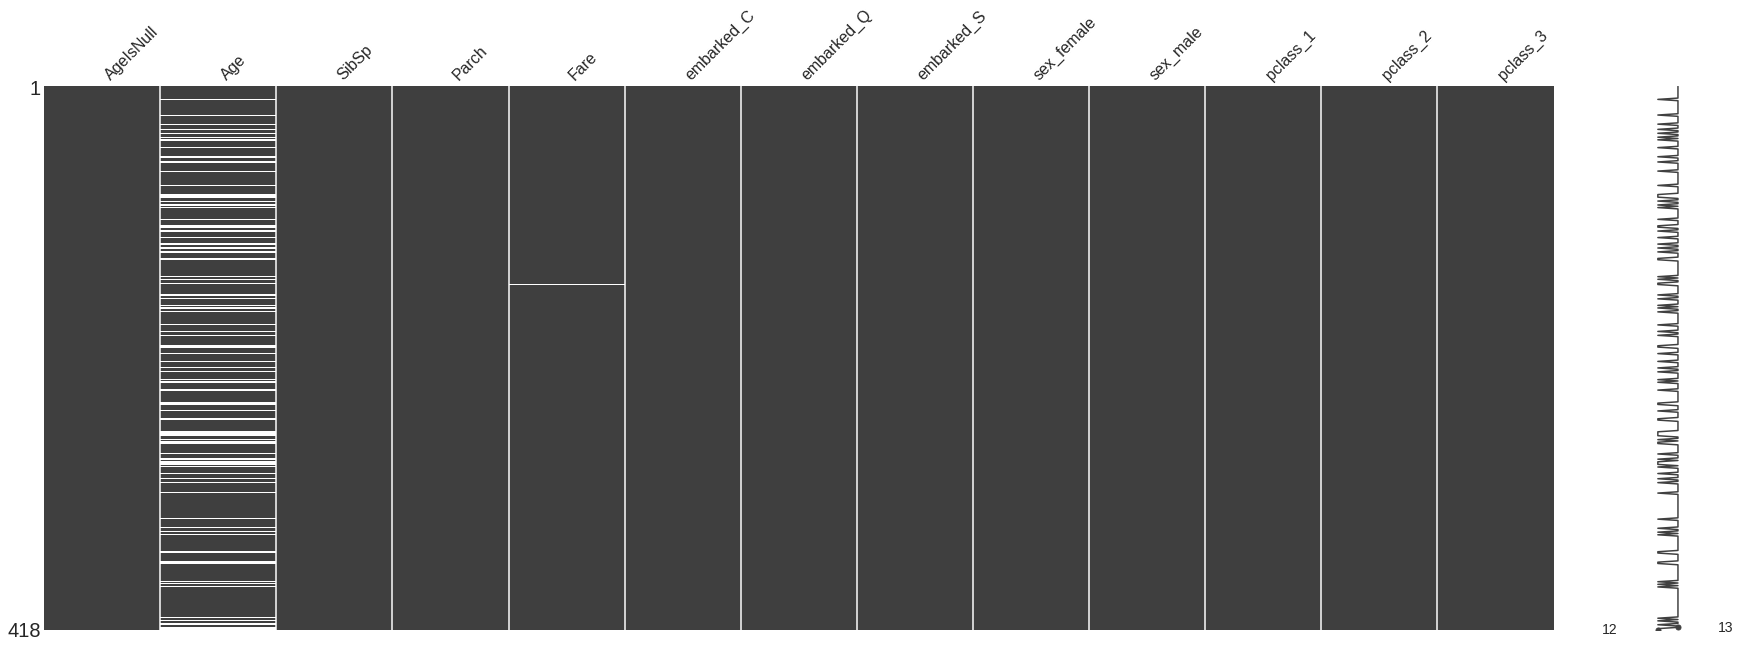

In [182]:
missingno.matrix(test[wanted_test_columns], figsize = (30,10))

In [183]:
test[wanted_test_columns].isnull().sum()

AgeIsNull      0
Age           86
SibSp          0
Parch          0
Fare           1
embarked_C     0
embarked_Q     0
embarked_S     0
sex_female     0
sex_male       0
pclass_1       0
pclass_2       0
pclass_3       0
dtype: int64

In [186]:
test['Fare'].fillna((test['Fare'].mean()), inplace=True)

In [187]:
test['Age'].fillna((test['Age'].mean()), inplace=True)

In [188]:
test[wanted_test_columns].isnull().sum()

AgeIsNull     0
Age           0
SibSp         0
Parch         0
Fare          0
embarked_C    0
embarked_Q    0
embarked_S    0
sex_female    0
sex_male      0
pclass_1      0
pclass_2      0
pclass_3      0
dtype: int64

In [189]:
predictions = dtree_model.predict(test[wanted_test_columns])

In [190]:
# Our predictions array is comprised of 0's and 1's (Survived or Did Not Survive)
predictions[:20]

array([0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0])

In [191]:
# Create a submisison dataframe and append the relevant columns
submission = pd.DataFrame()
submission['PassengerId'] = test['PassengerId']
submission['Survived'] = predictions # our model predictions on the test dataset
submission.head()

PassengerId  Survived
0          892         0
1          893         0
2          894         1
3          895         1
4          896         1

In [192]:
# What does our submission have to look like?
gender_submission.head()

PassengerId  Survived
0          892         0
1          893         1
2          894         0
3          895         0
4          896         1

We need our `submission` dataframe to look like the `gender_submisison` dataframe, so we'll turn the `Survived` column into integers.

In [193]:
# Let's convert our submission dataframe 'Survived' column to ints
submission['Survived'] = submission['Survived'].astype(int)
print('Converted Survived column to integers.')

Converted Survived column to integers.


In [194]:
# How does our submission dataframe look?
submission.head()

PassengerId  Survived
0          892         0
1          893         0
2          894         1
3          895         1
4          896         1

In [195]:
# Are our test and submission dataframes the same length?
if len(submission) == len(test):
    print("Submission dataframe is the same length as test ({} rows).".format(len(submission)))
else:
    print("Dataframes mismatched, won't be able to submit to Kaggle.")

Submission dataframe is the same length as test (418 rows).


In [196]:
# Convert submisison dataframe to csv for submission to csv 
# for Kaggle submisison
submission.to_csv('../dtree_submission2.csv', index=False)
print('Submission CSV is ready!')

Submission CSV is ready!


In [232]:
# Check the submission csv to make sure it's in the right format
submissions_check = pd.read_csv("../dtree_submission2.csv")
submissions_check.head(5)

PassengerId  Survived
0          892         0
1          893         0
2          894         1
3          895         1
4          896         1

### Now ready to submit .csv to Kaggle! 
